In [1]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

(0.1, 5.7, 16.21211004257202)


# Optimization for Machine Learning

### Experiment 1: Gradient descent tuning

In [2]:
# fixed parameters
num_layers = 2
num_hidden = 100
num_epochs = 100

# variable parameters
lr_min, lr_max, lr_n = 0.0001, 0.1, 5
mini_batch_size_min, mini_batch_size_max, mini_batch_size_n = 1, 4096, 5
momentum_min, momentum_max, momentum_n = 0.0, 1.0, 5

# experiment parameters
seed = 0
num_trials = lr_n*mini_batch_size_n*momentum_n

#### Random search

In [3]:
parameters_range = {'lr': (lr_min, lr_max, 'discrete_loguniform_10'),
                    'mini_batch_size': (mini_batch_size_min, mini_batch_size_max, 'discrete_loguniform_2'),
                    'momentum': (momentum_min, momentum_max, 'uniform'),
                    'num_hidden': (num_hidden, num_hidden, 'fixed'),
                    'num_layers': (num_layers, num_layers, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
parameters = random_hyperparameters(parameters_range, int(num_trials), seed)

In [4]:
results = random_search(parameters)

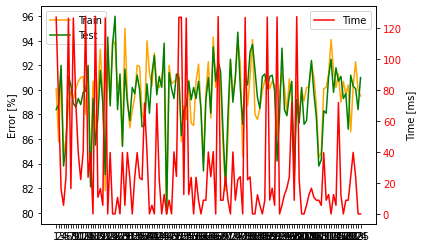

In [5]:
visualize_experiment(results)

#### Grid search

In [6]:
parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size_min, mini_batch_size_max, mini_batch_size_n, 'discrete_logspace_2'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)

In [7]:
results = grid_search(parameters)

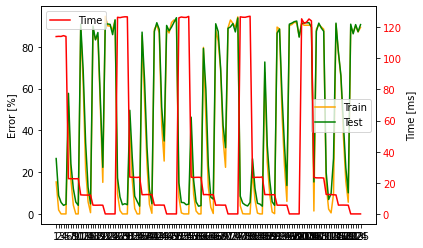

In [8]:
visualize_experiment(results)

#### Bayesian optimisation

In [9]:
bo_optimizer = TuneBO( parameters_range=parameters_range)

### Experiment 2: Model architecture tuning

In [10]:
# fixed parameters
lr = 0.1
momentum = 0.9
mini_batch_size = 100

# variable parameters
num_hidden_min, num_hidden_max, num_hidden_n = 10, 1000, 10
num_layers_min, num_layers_max, num_layers_n = 1, 4, 4
num_epochs_min, num_epochs_max, num_epochs_n = 10, 1000, 3

# experiment parameters
seed = 0
num_trials = num_hidden_n*num_layers_n*num_epochs_n

#### Random search

In [441]:
parameters_range = {'lr': (lr, lr, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 'fixed'),
                    'momentum': (momentum, momentum, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete'),
                    'num_epochs': (num_epochs_min, num_epochs_max, 'discrete')}
parameters = random_hyperparameters(parameters_range, num_trials, seed)

In [291]:
results = random_search(parameters)

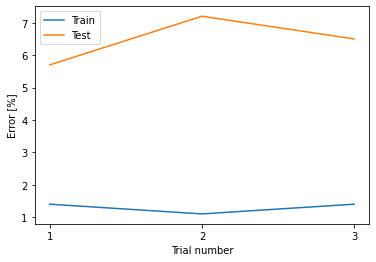

In [292]:
visualize_experiment(results)

#### Grid search

In [434]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_linspace'),
                    'num_epochs': (num_epochs_min, num_epochs_max, num_epochs_n, 'discrete_linspace')}
parameters = grid_hyperparameters(parameters_range)

In [392]:
results = grid_search(parameters)

KeyboardInterrupt: 

In [ ]:
visualize_experiment(results)

#### Bayesian optimisation

### Experiment 3: Complete tuning